<a href="https://colab.research.google.com/github/aduranmayol/Machine-Learning-Project-Customer-Churn-Prediction/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2025-04-10 08:30:58--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.2’

cats_and_dogs.zip.2 100%[===================>]  67.43M   120MB/s    in 0.6s    

2025-04-10 08:30:58 (120 MB/s) - ‘cats_and_dogs.zip.2’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
# 3
train_image_generator = ImageDataGenerator(train_dir, rescale=1./255)
validation_image_generator = ImageDataGenerator(validation_dir, rescale=1./255)
test_image_generator = ImageDataGenerator(test_dir, rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                        target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                        class_mode='binary',
                                                        batch_size=batch_size,
                                                        shuffle=True)
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                        target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                        class_mode='binary',
                                                        batch_size=batch_size,
                                                        shuffle=True)
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                        target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                        class_mode='binary',
                                                        batch_size=batch_size,
                                                        shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


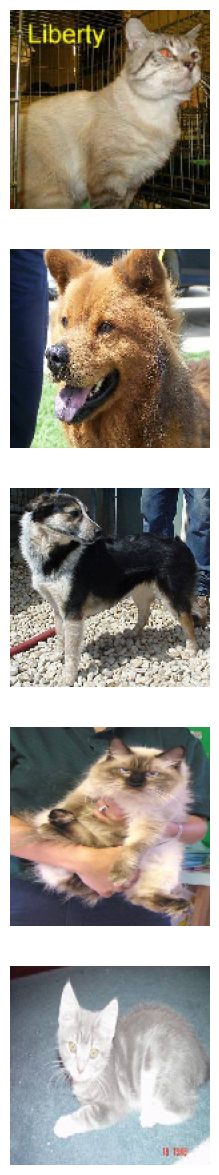

In [14]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [20]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # correct scaling (not 1./225)
    rotation_range=40,           # randomly rotate images in the range (degrees)
    width_shift_range=0.2,       # randomly shift images horizontally (as a fraction of total width)
    height_shift_range=0.2,      # randomly shift images vertically (as a fraction of total height)
    shear_range=0.2,             # shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,              # randomly zoom images
    horizontal_flip=True,        # randomly flip images horizontally
    fill_mode='nearest'          # how to fill newly created pixels
)

Found 2000 images belonging to 2 classes.


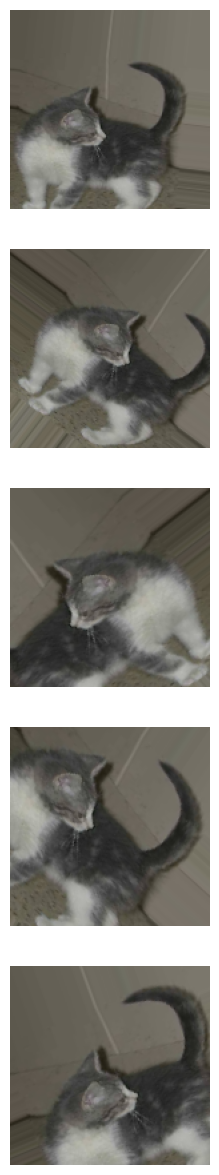

In [21]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [22]:
# 7
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),         # Fully connected layer
    Dense(1, activation='sigmoid')         # Output layer with class probabilities (3 classes)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # use 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
history = model.fit(
    train_data_gen,
    epochs=epochs,
    steps_per_epoch=len(train_data_gen),
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 138s 8s/step - accuracy: 0.4844 - loss: 0.9543 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 137s 8s/step - accuracy: 0.4979 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 156s 9s/step - accuracy: 0.5220 - loss: 0.6910 - val_accuracy: 0.5070 - val_loss: 0.6891
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.5306 - loss: 0.6875 - val_accuracy: 0.5260 - val_loss: 0.6770
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.5554 - loss: 0.6770 - val_accuracy: 0.6120 - val_loss: 0.6521
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 132s 8s/step - accuracy: 0.5557 - loss: 0.6776 - val_accuracy: 0.6420 - val_loss: 0.6449
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.6070 - loss: 0.6523 - val_accuracy: 0.6010 - val_loss: 0.6504
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.6044 - loss: 0.6386 - val_accuracy: 0.6460 - v

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
images, labels = next(test_data_gen)  # Get the next batch of images and their true labels

# Step 2: Get predictions (probabilities) for the images in this batch
probabilities = model.predict(images, batch_size=batch_size, steps=len(images))  # Model predictions (probabilities)


In [ ]:
plotImages(images[:5], probabilities[:5])

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")